In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_parquet('/mnt/c/mldata/aliccp/train_processed/')

In [3]:
df

,item_intention,item_brand,position,item_id,item_category,item_shop,user_item_categories,user_profile,user_group,user_id,...,user_intentions,user_brands,user_categories,user_shops,click,conversion,user_item_shops,user_item_brands,user_item_intentions,user_consumption
0,9093445,9154780,9351665,4186222,8316799,8416205,9355039,3438658,3438762,31390,...,3941161,3812616,449068,569621,0,0,None,None,None,None
1,9104107,9188757,9351665,4186855,8316676,8482726,None,3438658,3438762,31390,...,3941161,3812616,449068,569621,0,0,None,None,None,None
2,9115551,9165876,9351665,4479003,8316590,8542197,9354837,3438658,3438762,31390,...,3941161,3812616,449068,569621,1,0,9511769,9867762,10083008,None
3,9035395,9323908,9351665,4933915,8316177,8529759,9354448,3438658,3438762,31390,...,3941161,3812616,449068,569621,0,0,None,None,10079838,None
4,9030554,9172179,9351665,4945663,8316589,8754197,9354836,3438658,3438762,31390,...,3941161,3812616,449068,569621,0,0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41999766,9035600,9226302,9351666,6728948,8316887,8497122,9355124,3438658,3438762,396837,...,3890956,3715607,450878,1866370,0,0,None,9910773,None,None
41999767,9083976,9214973,9351666,6805207,8317006,8826191,9355236,3438658,3438762,396837,...,3890956,3715607,450878,1866370,0,0,None,None,10043857,None
41999768,9030542,9121315,9351666,6811598,8316503,8655068,None,3438658,3438762,396837,...,3890956,3715607,450878,1866370,0,0,None,None,None,None
41999769,9092946,9281395,9351666,6875714,8314560,8502261,None,3438658,3438762,396837,...,3890956,3715607,450878,1866370,0,0,None,None,None,None


In [4]:
len(df['user_id'].unique())

294865

In [26]:
df['counter'] = 1
df_agg = df[['item_id','counter']].groupby('item_id').count()
df_agg = df_agg[df_agg['counter']>10]
df_agg

,counter
item_id,
3964450,64
3964460,11
3964468,13
3964536,92
3964547,35
...,...
8312940,12
8312950,22
8312976,88


In [27]:
df_agg[7224538]

KeyError: 7224538

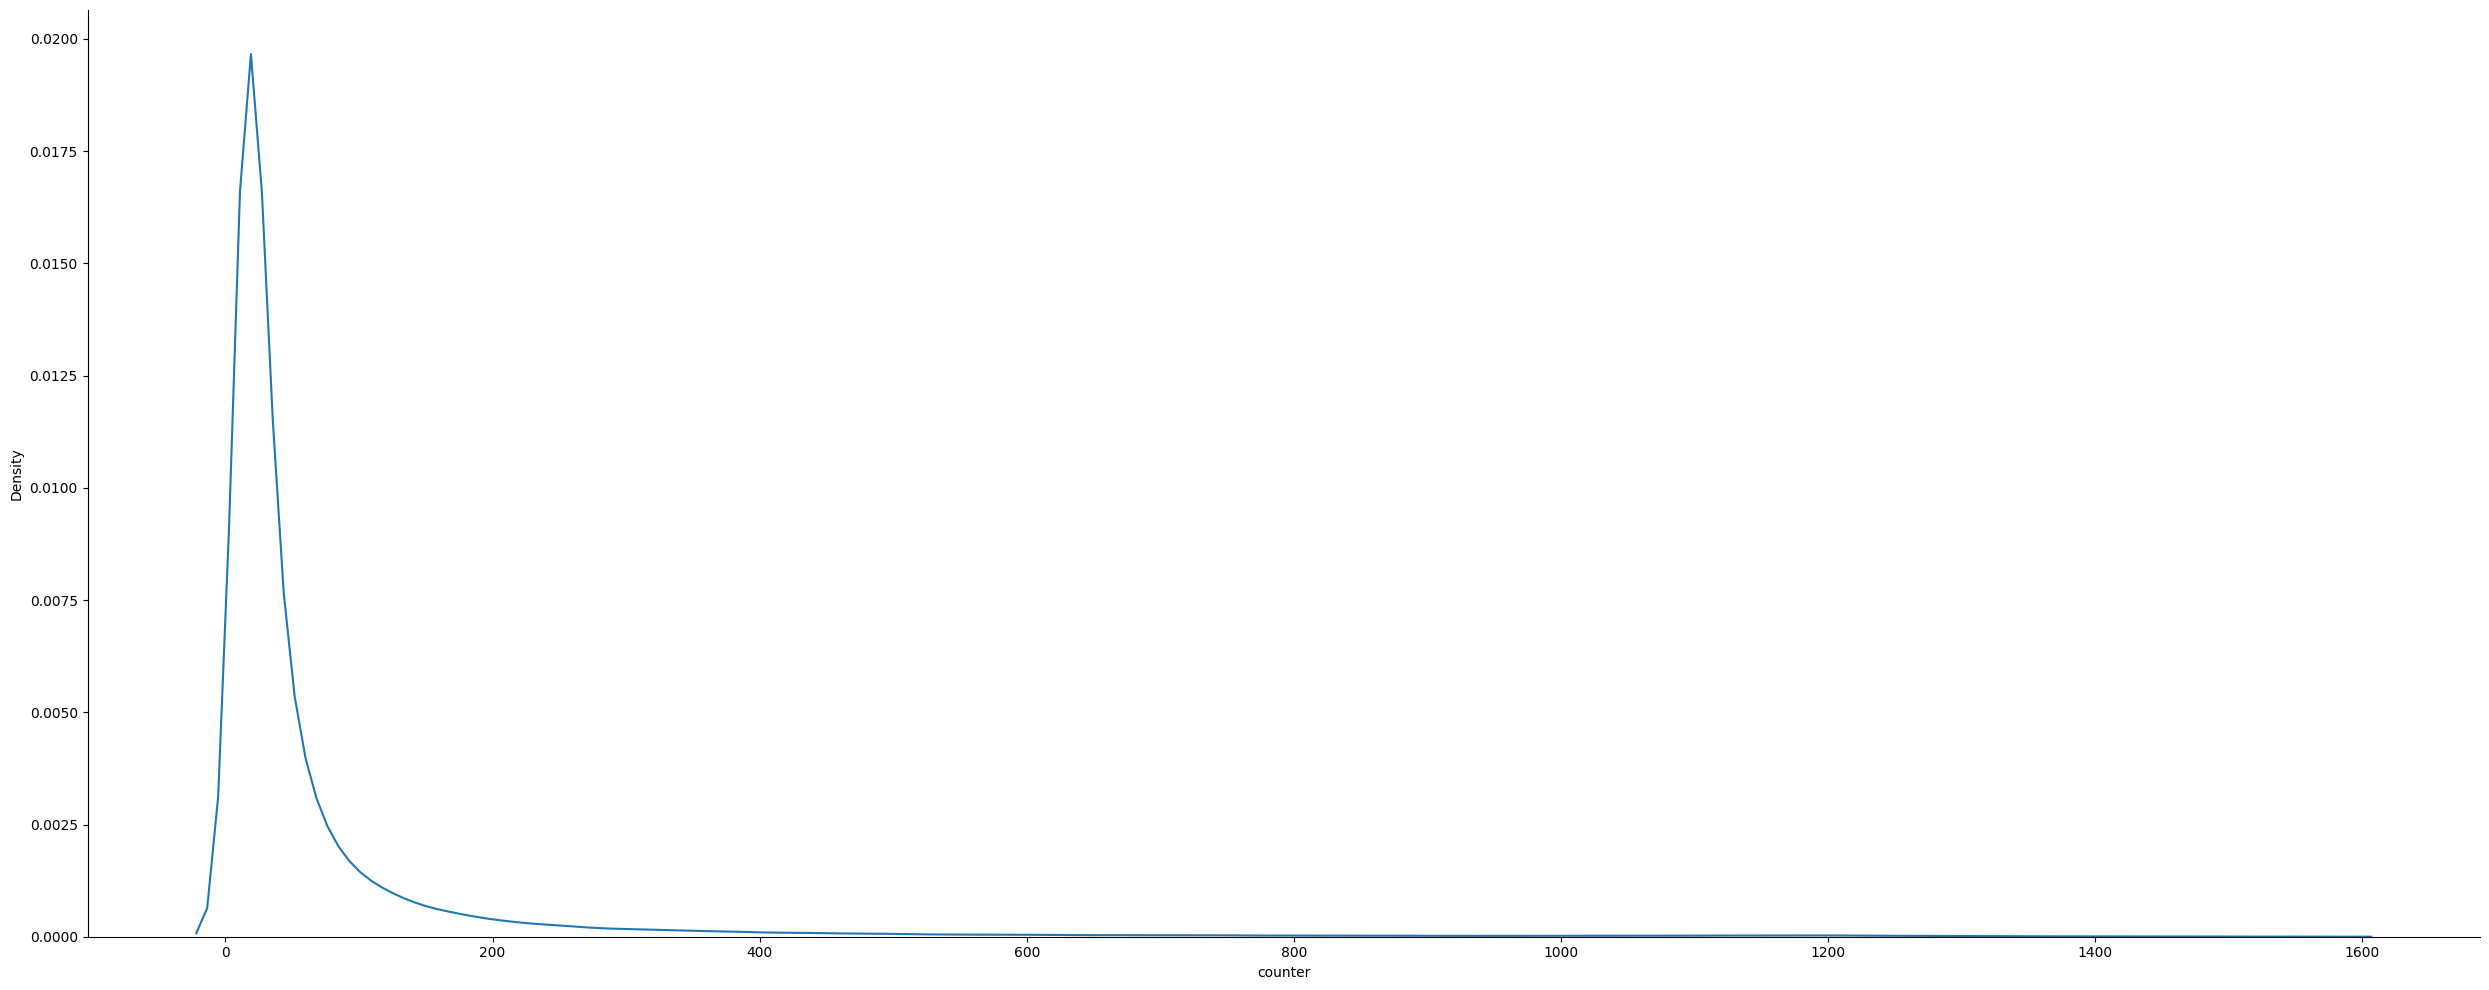

In [6]:
sns.displot(df_agg, x="counter", height=10, aspect=20/8,kind='kde')

In [7]:
df_agg.sort_values("counter",ascending=False)[:20]

,counter
item_id,
7632773,1574
4812625,1572
8307487,1549
7840527,1548
5455488,1548
7580902,1545
6081596,1542
6417568,1537
7406987,1533


In [8]:
df['counter'] = 1
cust_agg = df[['user_id','counter']].groupby('user_id').count()

In [9]:
cust_agg.sort_values("counter")

,counter
user_id,
293811,1
190466,1
341809,1
22706,1
68285,1
...,...
207360,3165
56307,3261
222980,3360


In [10]:
df['counter'] = 1
df_agg = df[['item_id','counter']].groupby('item_id').count()
df_agg = df_agg[df_agg['counter']>500]
df_filtered = pd.merge(df_agg, df, on=['item_id', 'item_id'], how='left')

In [11]:
len(df_filtered)

10621795

In [12]:
df_filtered['counter'] = 1
cust_agg = df_filtered[['user_id','counter']].groupby('user_id').count()
cust_agg = cust_agg[cust_agg['counter']>50]
df_filtered = pd.merge(cust_agg, df_filtered, on=['user_id', 'user_id'], how='left')

/tmp/ipykernel_141/2060354962.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'counter_y'} in the result is deprecated and will raise a MergeError in a future version.
  df_filtered = pd.merge(cust_agg, df_filtered, on=['user_id', 'user_id'], how='left')


In [13]:
len(df_filtered)

7079415

In [15]:

from typing import Dict, Text
import pandas as pd
import numpy as np
import tensorflow as tf
import mlflow
import tensorflow_recommenders as tfrs
import datetime
import gc
# Load it back; can also be done in TensorFlow Serving.
loaded = tf.saved_model.load("index")


2023-03-03 15:20:12.256771: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 15:20:12.746704: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-03 15:20:12.746782: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-03 15:20:12.746788: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [28]:
np.unique(loaded([5000])[0].numpy())


array([0.4002958 , 0.40324426], dtype=float32)

In [18]:
loaded

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7fd5d11673d0>